 ## <span style = 'color: DodgerBlue'> Relationship between Lifestyle Habits and Meditation

<u> Problem Description </u> Using a survey of different lifestyle habits to predict frequency of meditation 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
data = pd.read_csv("Lifestyle_data.csv")
data.head()

,Unnamed: 0,TimeStamp,Meditation_Week,Donation_Category,Sleep_Hours,Sufficient_Income,BMI_Satisfaction,Excercise_Week,Close_Friends,Vegetable_Week,Fruits_Week,Passions_enjoyed,Vacation_taken
0,0,5/15/2019,5,< $200,11,4,Unsatisfied,3,7,14,12,9,7
1,1,5/15/2019,4,< $200,6,5,Unsatisfied,7,6,12,11,5,7
2,2,5/15/2019,4,$201-$999,10,3,Satisfied,4,6,5,7,10,6
3,3,5/15/2019,7,> $1000,12,4,Neutral,9,11,9,13,12,8
4,4,5/15/2019,6,$201-$999,11,4,Unsatisfied,6,10,10,14,10,9


 ## <span style = 'color: DodgerBlue'> Exploration



In [16]:
data = data.drop(['TimeStamp', 'Unnamed: 0'], axis = 1)
data.columns

Index(['Meditation_Week', 'Donation_Category', 'Sleep_Hours',
       'Sufficient_Income', 'BMI_Satisfaction', 'Excercise_Week',
       'Close_Friends', 'Vegetable_Week', 'Fruits_Week', 'Passions_enjoyed',
       'Vacation_taken'],
      dtype='object')

In [17]:
data.isnull().sum(),  data.dtypes

(Meditation_Week      0
 Donation_Category    0
 Sleep_Hours          0
 Sufficient_Income    0
 BMI_Satisfaction     0
 Excercise_Week       0
 Close_Friends        0
 Vegetable_Week       0
 Fruits_Week          0
 Passions_enjoyed     0
 Vacation_taken       0
 dtype: int64,
 Meditation_Week       int64
 Donation_Category    object
 Sleep_Hours           int64
 Sufficient_Income     int64
 BMI_Satisfaction     object
 Excercise_Week        int64
 Close_Friends         int64
 Vegetable_Week        int64
 Fruits_Week           int64
 Passions_enjoyed      int64
 Vacation_taken        int64
 dtype: object)

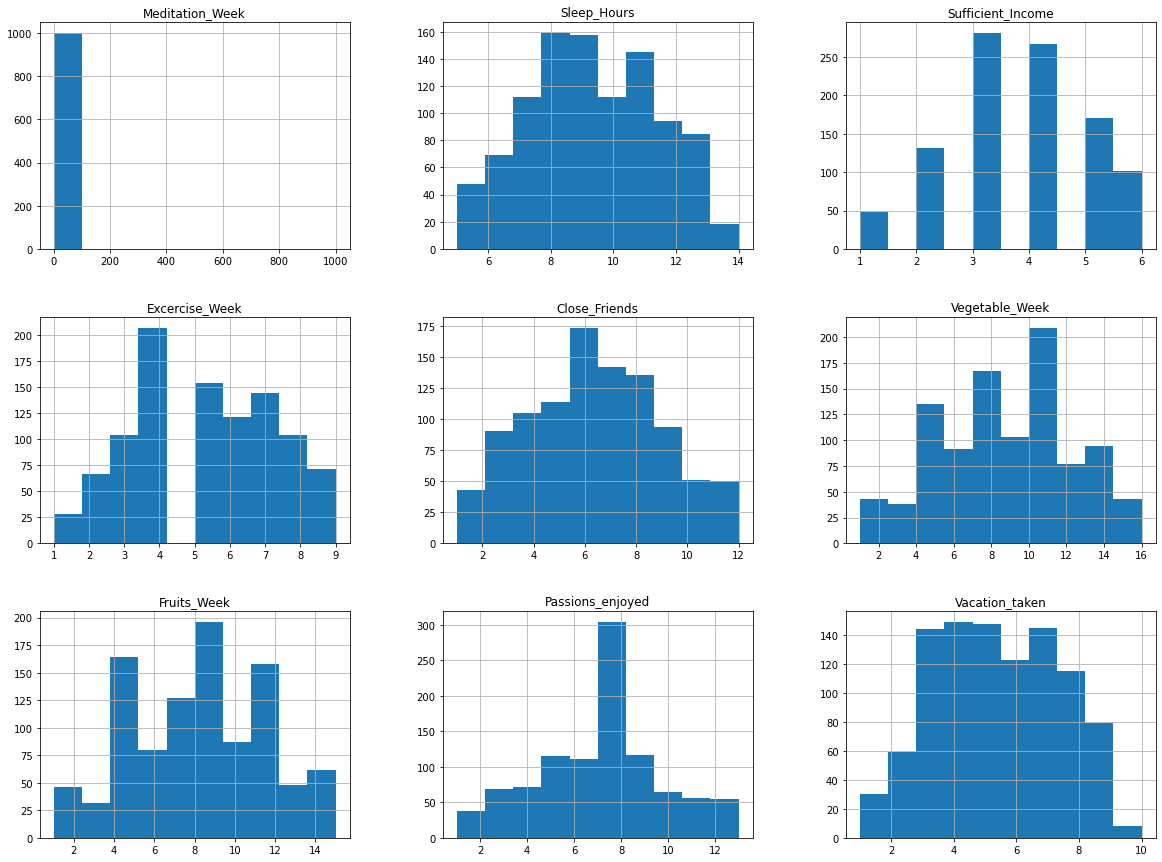

In [18]:
data.hist(bins=10, figsize=(20,15))
plt.show() 

#the distribution of the 'Meditation_Week' indicates a likely outlier

In [19]:
data.describe()

,Meditation_Week,Sleep_Hours,Sufficient_Income,Excercise_Week,Close_Friends,Vegetable_Week,Fruits_Week,Passions_enjoyed,Vacation_taken
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.936000,9.332000,3.685000,5.277000,6.389000,8.578000,8.146000,7.070000,5.380000
std,31.561908,2.288889,1.312058,2.090608,2.416924,3.498307,3.354391,2.646149,2.190525
min,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,8.000000,3.000000,4.000000,5.000000,6.000000,6.000000,5.000000,4.000000
50%,4.000000,9.000000,4.000000,5.000000,6.000000,9.000000,8.000000,7.000000,5.000000
75%,6.000000,11.000000,5.000000,7.000000,8.000000,11.000000,11.000000,9.000000,7.000000
max,1000.000000,14.000000,6.000000,9.000000,12.000000,16.000000,15.000000,13.000000,10.000000


In [20]:

data.query('Meditation_Week == 1000') #1000 is an outlier

,Meditation_Week,Donation_Category,Sleep_Hours,Sufficient_Income,BMI_Satisfaction,Excercise_Week,Close_Friends,Vegetable_Week,Fruits_Week,Passions_enjoyed,Vacation_taken
764,1000,> $1000,5,3,Neutral,7,3,9,7,3,2


In [21]:
data.drop(764, axis = 0, inplace = True)


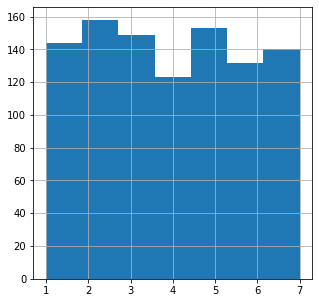

In [22]:
#distribution improves once outlier is removed 


data['Meditation_Week'].hist(bins=7, figsize=(5,5))
plt.show()

 ## <span style = 'color: DodgerBlue'> Data Transfromation

In [23]:
ordinal_features = ['BMI_Satisfaction', 'Donation_Category']
numerical_features = ['Sleep_Hours', 'Excercise_Week', 'Close_Friends', 'Vegetable_Week', 'Fruits_Week', 'Passions_enjoyed',
       'Vacation_taken', 'Sufficient_Income']


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

bmi = ['Unsatisfied', 'Neutral', 'Satisfied' ]
donation = ['< $200', '$201-$999', '> $1000']



categorical_transfromer = Pipeline(steps =[
    ('ordinal', OrdinalEncoder(categories= [bmi, donation]))
])

preprocessor = ColumnTransformer( transformers=[
    ('numeric_transformer_label', numeric_transformer, numerical_features),
    ('categorical_transformer_label', categorical_transfromer, ordinal_features)
])

In [25]:


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = data.drop('Meditation_Week', axis = 1)
y = data['Meditation_Week']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state = 0)



 ## <span style = 'color: DodgerBlue'> Models

In [26]:
from sklearn.linear_model import Ridge


paramaters = ({ 'ridge__alpha': [.01, 1, 2], 'ridge__fit_intercept': [True, False], 'ridge__max_iter' : [None, 1000, 1500]}) 

ridge_pipe = Pipeline (steps=[
    ('preprocessor_label', preprocessor),
    ('ridge', Ridge( random_state=0))
 ])


ridge_gs = GridSearchCV(ridge_pipe,  param_grid = paramaters, cv = 5  )
ridge_gs.fit(X_train, y_train).score(X_test, y_test)


0.8827088939865488

In [27]:
from sklearn.linear_model import ElasticNet

paramaters =  {'elastic__fit_intercept':[True, False], 'elastic__max_iter': [500, 1000, 1500, 2000] }

elastic_pipe = Pipeline([
    ('preprocessor_label', preprocessor),
    ('elastic', ElasticNet()),
])

elastic_gs = GridSearchCV(elastic_pipe,  param_grid = paramaters, cv = 5 )
elastic_gs.fit(X_train, y_train).score(X_test, y_test)



0.6958928630327635

In [28]:
from sklearn.linear_model import LinearRegression

paramaters = {'linear__fit_intercept': [True, False]}

linear_pipe = Pipeline([
    ('preprocessor_label', preprocessor),
    ('linear', LinearRegression())
])

linear_gs = GridSearchCV(linear_pipe, param_grid = paramaters, cv= 5)
linear_gs.fit(X_train, y_train).score(X_test, y_test)


0.8827061981354773

In [29]:
from sklearn.ensemble import ExtraTreesRegressor

paramaters = { 'extra__n_estimators' : [500, 1000, 1500, 2000, 2500], 'extra__max_depth' : [ 10, 20, 30], 'extra__min_samples_leaf': [1, 3, 5]  }

extra_pipe = Pipeline([
    ('preprocessor_label', preprocessor),
    ('extra', ExtraTreesRegressor(random_state=0))
])



extra_gs = GridSearchCV(extra_pipe, param_grid = paramaters, cv = 5)
extra_gs.fit(X_train, y_train).score(X_test, y_test)

0.9073752498351922

In [30]:

print(extra_gs.best_params_)
print(linear_gs.best_params_)
print(elastic_gs.best_params_)
print(ridge_gs.best_params_)

{'extra__max_depth': 30, 'extra__min_samples_leaf': 1, 'extra__n_estimators': 2500}
{'linear__fit_intercept': True}
{'elastic__fit_intercept': True, 'elastic__max_iter': 500}
{'ridge__alpha': 2, 'ridge__fit_intercept': True, 'ridge__max_iter': None}


In [31]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('extra' , ExtraTreesRegressor(max_depth =30, min_samples_leaf= 1, n_estimators = 2500,  random_state=0)),
    ('linear', LinearRegression(fit_intercept = True) ),
]

stacking_models = Pipeline(steps = [
    ('preprocessor_label', preprocessor),
    ('stacking' , StackingRegressor(estimators = estimators,
    final_estimator = Ridge( alpha = 2, fit_intercept = True, max_iter = None,  random_state=0))
)])

stacking_models.fit(X_train, y_train).score(X_test, y_test)

0.9116533014267949

Stacking regressor had the highest R2 score at .92

 ## <span style = 'color: DodgerBlue'> Visualize

In [32]:
from sklearn.inspection import permutation_importance

results = permutation_importance(stacking_models, X_test ,y_test, n_repeats=10,  random_state=0, scoring = 'r2')

In [33]:
beta =pd.DataFrame({'features': X.columns, 'importance': results.importances_mean})
beta = beta.sort_values('importance', ascending= False )

<AxesSubplot:xlabel='importance', ylabel='features'>

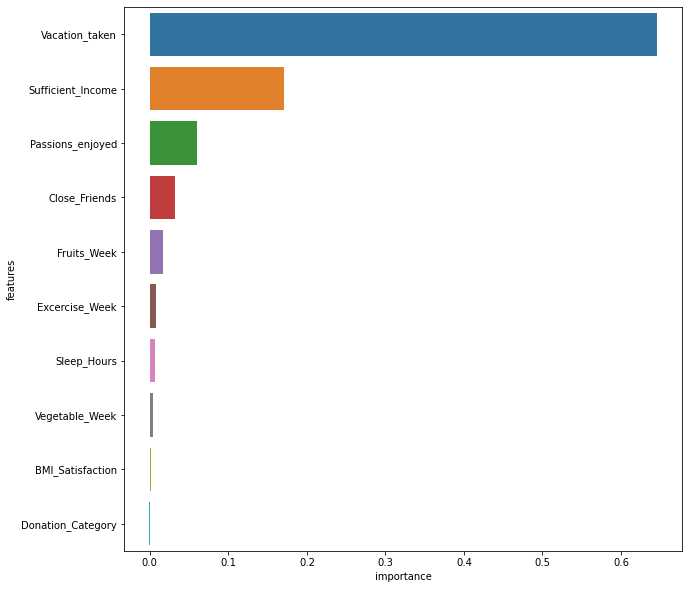

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize= (10, 10))
sns.barplot(y = 'features', x = 'importance', data =beta)

<u>Conclusion</u> Using a stacking regressor composed of ExtraTrees, Linear and Ridge  Regression models I was able to predict  the frequency of meditation with an R2 score of .92.  Vacation_taken, Sufficent_income and Passions_enjoyed were the most important predictors. 